# 📃 Solution for Exercise M5.01

In the previous notebook, we showed how a tree with a depth of 1 level was
working. The aim of this exercise is to repeat part of the previous
experiment for a depth with 2 levels to show how the process of partitioning
is repeated over time.

Before to start, we will:

* load the dataset;
* split the dataset into training and testing dataset;
* define the function to show the classification decision function.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [2]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

Create a decision tree classifier with a maximum depth of 2 levels and fit
the training data. Once this classifier trained, plot the data and the
decision boundary to see the benefit of increasing the depth. To plot the
decision boundary, you should import the class `DecisionBoundaryDisplay`
from the module `sklearn.inspection` as shown in the previous course notebook.

In [3]:
###### solution
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8)

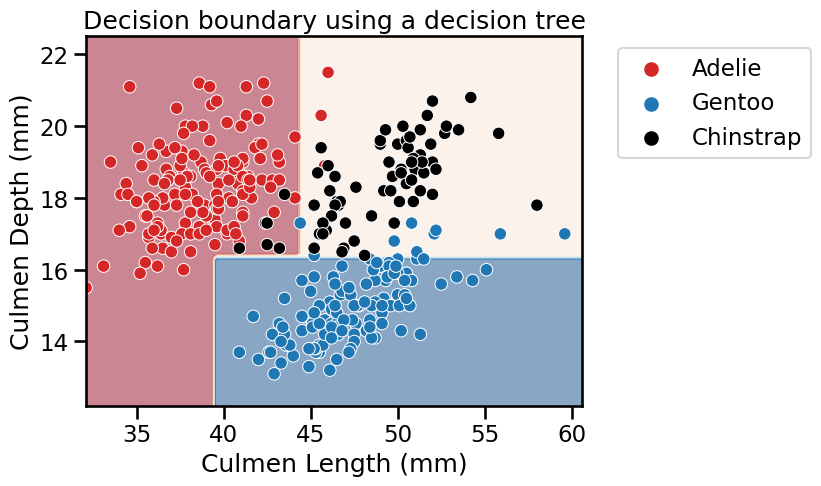

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.inspection import DecisionBoundaryDisplay

palette = ["tab:red", "tab:blue", "black"]
DecisionBoundaryDisplay.from_estimator(
    tree, data_train, response_method="predict", cmap="RdBu", alpha=0.5
)
ax = sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a decision tree")

Did we make use of the feature "Culmen Length"?
Plot the tree using the function `sklearn.tree.plot_tree` to find out!

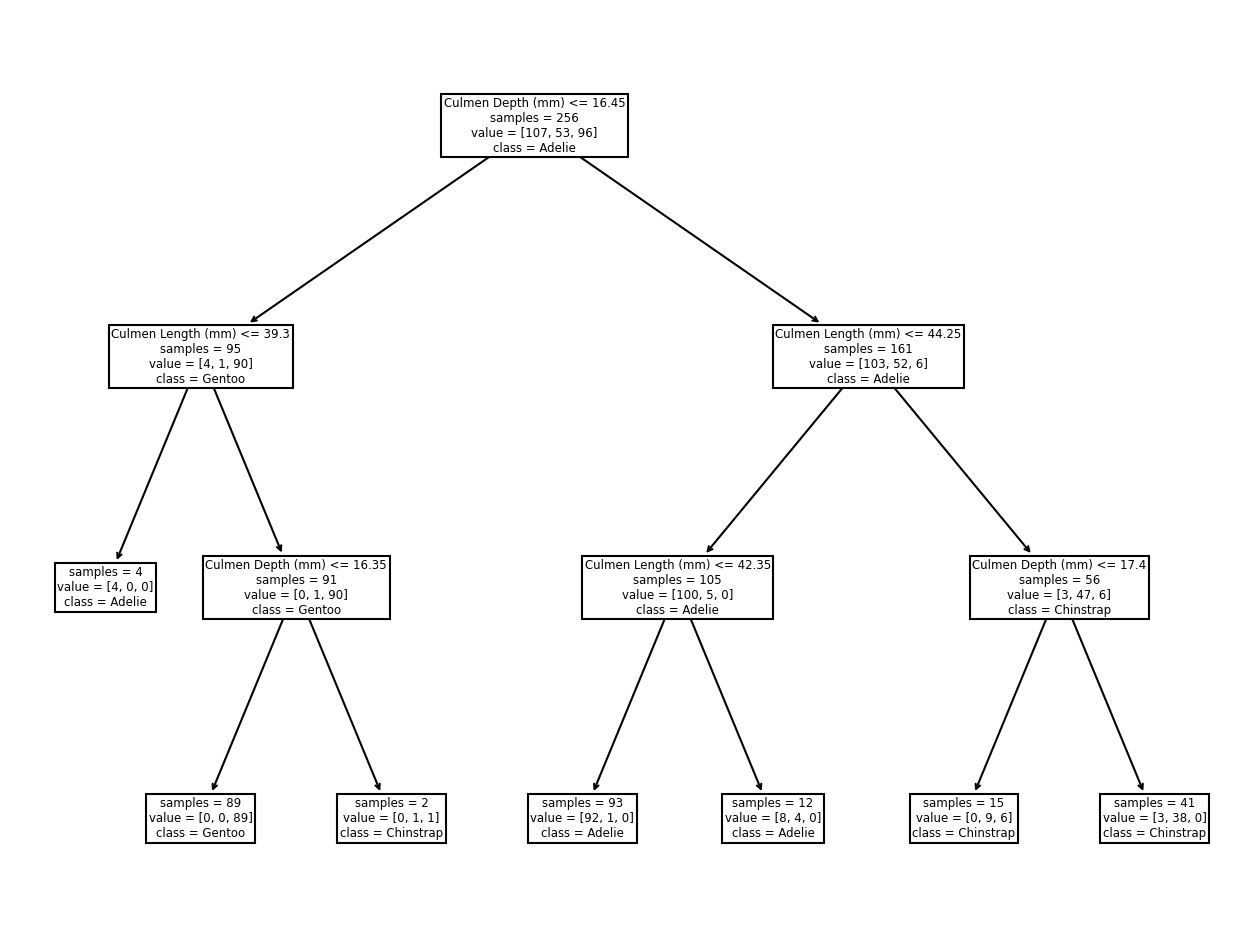

In [5]:
# solution
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(16, 12))
_ = plot_tree(tree, feature_names=culmen_columns,
              class_names=tree.classes_, impurity=False, ax=ax)

The resulting tree has 7 nodes: 3 of them are "split nodes" and 4
are "leaf nodes" (or simply "leaves"), organized in 2 levels.
We see that the second tree level used the "Culmen Length" to make
two new decisions. Qualitatively, we saw that such a simple tree was enough
to classify the penguins' species.

Compute the accuracy of the decision tree on the testing data.

In [6]:
# solution
test_score = tree.fit(data_train, target_train).score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.7f}")

Accuracy of the DecisionTreeClassifier: 0.9651163


At this stage, we have the intuition that a decision tree is built by
successively partitioning the feature space, considering one feature at a
time.

We predict an Adelie penguin if the feature value is below the threshold,
which is not surprising since this partition was almost pure. If the feature
value is above the threshold, we predict the Gentoo penguin, the class that
is most probable.